In [0]:
!pip install --upgrade tensorflow
!pip install -q tf-hub-nightly==0.8.0.dev201911110007
!pip install -q git+https://github.com/tensorflow/examples

     |████████████████████████████████| 86.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 45.4MB/s 
     |████████████████████████████████| 450kB 52.0MB/s 
     |████████████████████████████████| 81kB 12.9MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

     |████████████████████████████████| 92kB 5.4MB/s 


In [0]:
# Import TensorFlow and print the version to be sure we have 2.x version installed
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Install Kaggle library
!pip install kaggle
!pip install kaggle-cli

     |████████████████████████████████| 81kB 4.7MB/s 
     |████████████████████████████████| 5.3MB 13.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 112kB 34.8MB/s 
     |████████████████████████████████| 112kB 45.3MB/s 
  Created wheel for kaggle-cli: filename=kaggle_cli-0.12.13-cp36-none-any.whl size=9488 sha256=31b677597b36c0d6948321116f20fefd1553d99aa0bd30e1e31244f54cbb8ad1
  Stored in directory: /root/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Created wheel for pyperclip: filename=pyperclip-1.7.0-cp36-none-any.whl size=8359 sha256=93706e281819885c00a846a0e7b698f060144cb2e8a289d822951f3396879be9
  Stored in directory: /root/.cache/pip/wheels/92/f0/ac/2ba2972034e98971c3654ece337ac61e546bdeb34ca960dc8c
Successfully built kaggle-cli pyperclip
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: progressba

In [0]:
# To make sure the Kaggle.json file is in the right directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# Warning: Your Kaggle API key is readable by other users on this system! To fix this, you can run 
'chmod 600 /root/.kaggle/kaggle.json'

'chmod 600 /root/.kaggle/kaggle.json'

In [0]:
# Download the Cassava Desease dataset from Kaggle
!kaggle competitions download -c cassava-disease
# !kaggle datasets download -d ibrahimgoke/iris-dataset

 99% 1.04G/1.04G [00:12<00:00, 83.9MB/s]
100% 1.04G/1.04G [00:12<00:00, 89.7MB/s]
 97% 501M/515M [00:04<00:00, 108MB/s]
100% 515M/515M [00:04<00:00, 108MB/s]
 98% 761M/777M [00:12<00:00, 63.5MB/s]
100% 777M/777M [00:12<00:00, 67.2MB/s]
  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 83.5MB/s]
  0% 0.00/645k [00:00<?, ?B/s]
100% 645k/645k [00:00<00:00, 205MB/s]


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_customization.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_customization.core.task import image_classifier
from tensorflow_examples.lite.model_customization.core.task.model_spec import efficientnet_b0_spec
from tensorflow_examples.lite.model_customization.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt

In [0]:
# Unzip the datasets
!unzip train.zip

Archive:  train.zip
   creating: train/
   creating: train/cgm/
  inflating: train/cgm/train-cgm-738.jpg  
  inflating: train/cgm/train-cgm-704.jpg  
  inflating: train/cgm/train-cgm-710.jpg  
  inflating: train/cgm/train-cgm-248.jpg  
  inflating: train/cgm/train-cgm-260.jpg  
  inflating: train/cgm/train-cgm-506.jpg  
  inflating: train/cgm/train-cgm-512.jpg  
  inflating: train/cgm/train-cgm-274.jpg  
  inflating: train/cgm/train-cgm-328.jpg  
  inflating: train/cgm/train-cgm-314.jpg  
  inflating: train/cgm/train-cgm-472.jpg  
  inflating: train/cgm/train-cgm-466.jpg  
  inflating: train/cgm/train-cgm-300.jpg  
  inflating: train/cgm/train-cgm-499.jpg  
  inflating: train/cgm/train-cgm-658.jpg  
  inflating: train/cgm/train-cgm-46.jpg  
  inflating: train/cgm/train-cgm-670.jpg  
  inflating: train/cgm/train-cgm-116.jpg  
  inflating: train/cgm/train-cgm-102.jpg  
  inflating: train/cgm/train-cgm-52.jpg  
  inflating: train/cgm/train-cgm-664.jpg  
  inflating: train/cgm/train-cgm-85

In [0]:
# image_path = ("/content/train-test/train")
image_path = ("/content/train")
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 5656, num_label: 5, labels: Cassava Bacteria Blight, Cassava Brown Streak Disease, Cassava Green Mite, Cassava Mosaic Disease, Healthy Cassava.


INFO:tensorflow:Load image with size: 5656, num_label: 5, labels: Cassava Bacteria Blight, Cassava Brown Streak Disease, Cassava Green Mite, Cassava Mosaic Disease, Healthy Cassava.


In [0]:
import os
os.rmdir("train/.ipynb_checkpoints")

In [0]:
model = image_classifier.create(data, epochs=25)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   multiple                  2257984   
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Train for 141 steps, validate for 17 steps
Epoch 1/25
141/141 [==============================] - 280s 2s/step - loss: 1.1896 - accuracy: 0.6172 - val_loss: 0.9936 - val_accuracy: 0.7040
Epoch 2/25
141/141 [==============================] - 270s 2s/step - loss: 1.0241 - accuracy: 0.6941 - val_loss: 0.9814 - val_accuracy: 0.6930
Epoch 3/25
141/141 [==============================] - 268s 2s/step - loss: 0.9801 - accuracy: 0.7148 - val_loss: 0.9502 - val_accuracy: 0.7316
Epoch 4/25
141/141 [==============================] - 272s 2s/step - loss: 0.9542 - accuracy: 0.7230 - val_loss: 0.9774 - val_accuracy: 0.6985
Epoch 5/25
141/141 [==============================] - 266s 2s/step - loss: 0.9575 - accuracy: 0.7278 - val_loss: 0.9832 - val_accuracy: 0.7132
Epoch 6/25
141/141 [==============================] - 273s 2s/step - loss: 0.9417 - accuracy: 0.7394 - val_loss: 0.9587 - val_accuracy: 0.7316
Epoch 7/25
141/141 [==============================] - 274s 2s/step - loss: 0.9498 - accuracy: 0.729

In [0]:
loss, accuracy = model.evaluate()

18/18 [==============================] - 31s 2s/step - loss: 0.8866 - accuracy: 0.7735


In [0]:
model.export('cassava_disease_classifier_V3.tflite', 'cassava_image_labels_V3.txt')

INFO:tensorflow:Export to tflite model cassava_disease_classifier_V3.tflite, saved labels in cassava_image_labels_V3.txt.


INFO:tensorflow:Export to tflite model cassava_disease_classifier_V3.tflite, saved labels in cassava_image_labels_V3.txt.


In [0]:
#Download saved model lite and model label
from google.colab import files
files.download('cassava_disease_classifier_V3.tflite')
# files.download('cassava_image_labels_V3.txt')

In [0]:
# Read TensorFlow Lite model from TensorFlow Lite file.
with tf.io.gfile.GFile('cassava_disease_classifier_V3.tflite', 'rb') as f:
  model_content = f.read()

# Read label names from label file.
with tf.io.gfile.GFile('cassava_image_labels_V3.txt', 'r') as f:
  label_names = f.read().split('\n')

# Initialze TensorFlow Lite inpterpreter.
interpreter = tf.lite.Interpreter(model_content=model_content)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

# Run predictions on each test image data and calculate accuracy.
accurate_count = 0
for i, (image, label) in enumerate(model.test_data.dataset):
    # Pre-processing should remain the same. Currently, just normalize each pixel value and resize image according to the model's specification.
    image, _ = model.preprocess(image, label)
    # Add batch dimension and convert to float32 to match with the model's input
    # data format.
    image = tf.expand_dims(image, 0).numpy()

    # Run inference.
    interpreter.set_tensor(input_index, image)
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the label with highest
    # probability.
    predict_label = np.argmax(output()[0])
    # Get label name with label index.
    predict_label_name = label_names[predict_label]

    accurate_count += (predict_label == label.numpy())

accuracy = accurate_count * 1.0 / model.test_data.size
print('TensorFlow Lite model accuracy = %.4f' % accuracy)

TensorFlow Lite model accuracy = 0.7735


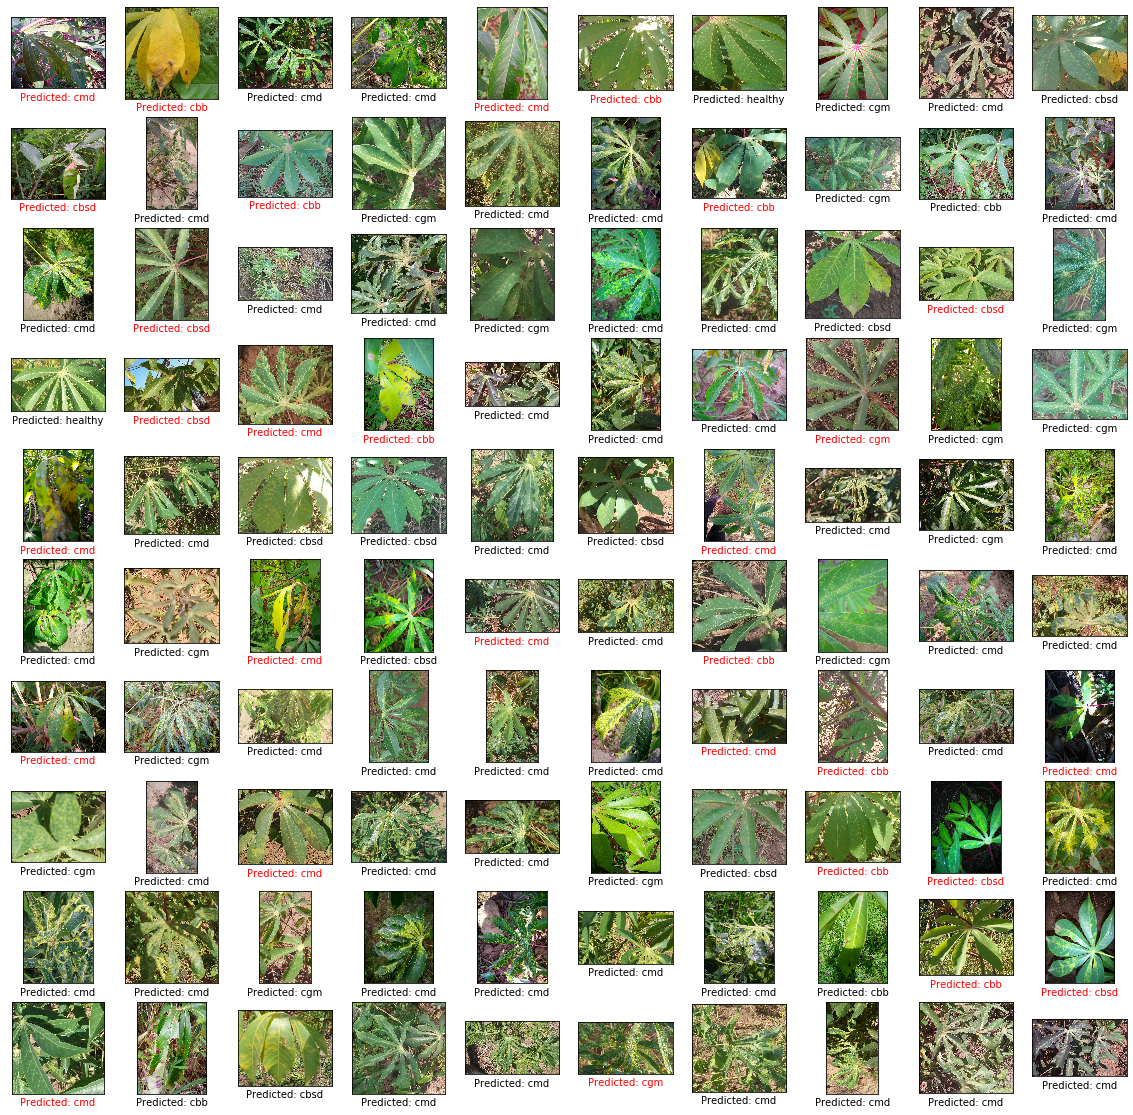

In [0]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_topk(model.test_data)
for i, (image, label) in enumerate(model.test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          model.test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()